<a href="https://colab.research.google.com/github/subhan0rizwan/getting-hands-dirty-pytorch/blob/main/training_basic_linear_nn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

%matplotlib inline


In [11]:
from math import inf
class Model(nn.Module):
  def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features = 3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [12]:
torch.manual_seed(41)
model = Model()

In [13]:
 url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
 my_df = pd.read_csv(url)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [14]:
my_df["variety"] = my_df["variety"].replace('Setosa', 0.0)

my_df["variety"] = my_df["variety"].replace('Versicolor', 1.0)

my_df["variety"] = my_df["variety"].replace('Virginica', 2.0)

/tmp/ipython-input-2615769293.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df["variety"] = my_df["variety"].replace('Virginica', 2.0)


In [15]:
X = my_df.drop('variety', axis = 1)
y = my_df['variety']

X = X.values
y = y.values


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 41)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [32]:
criteria = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [33]:
epochs = 1000
losses = []
for i in range (epochs):
  y_pred = model.forward(X_train)
  loss = criteria(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 0.0006344720022752881
Epoch: 10 and loss: 0.0006468914798460901
Epoch: 20 and loss: 0.0006210946594364941
Epoch: 30 and loss: 0.0006186174578033388
Epoch: 40 and loss: 0.0006134166615083814
Epoch: 50 and loss: 0.0006055645062588155
Epoch: 60 and loss: 0.0006003549206070602
Epoch: 70 and loss: 0.0005943747819401324
Epoch: 80 and loss: 0.0005884664715267718
Epoch: 90 and loss: 0.0005824851687066257
Epoch: 100 and loss: 0.0005763841909356415
Epoch: 110 and loss: 0.0005701707559637725
Epoch: 120 and loss: 0.0005638842121697962
Epoch: 130 and loss: 0.0005575192044489086
Epoch: 140 and loss: 0.0005511048948392272
Epoch: 150 and loss: 0.0005446349387057126
Epoch: 160 and loss: 0.0005381406517699361
Epoch: 170 and loss: 0.0005316188908182085
Epoch: 180 and loss: 0.0005250791436992586
Epoch: 190 and loss: 0.0005185388727113605
Epoch: 200 and loss: 0.0005119974375702441
Epoch: 210 and loss: 0.0005054615321569145
Epoch: 220 and loss: 0.0004989571752958
Epoch: 230 and loss: 0.00

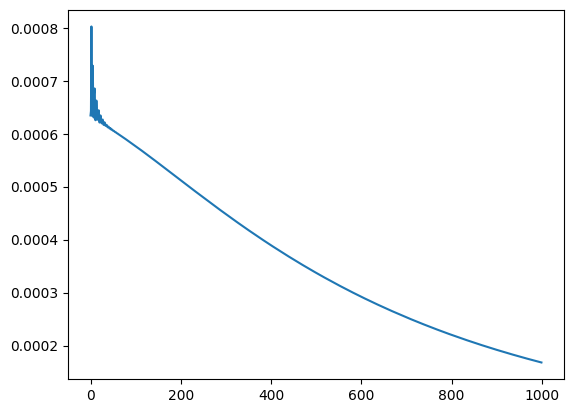

In [34]:
plt.plot(range(epochs), losses)